In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sys.path.append("../")

from lib.utils import *
from lib.Transformer import OptimalTransport

In [2]:
source = 'abide_large'
target = 'abide_small'
seed = 5


In [3]:
A_s, X_s, Y_s, has_label_mask_s = load_graph_data('../data/'+str(source)+'.mat')
A_t, X_t, Y_t, has_label_mask_t = load_graph_data('../data/'+str(target)+'.mat')

Y=np.concatenate((Y_s, Y_t),axis=0)
source_mask = np.concatenate((np.ones(Y_s.shape[0],dtype=bool), np.zeros(Y_t.shape[0],dtype=bool)),axis=0)
target_mask = np.concatenate((np.zeros(Y_s.shape[0],dtype=bool), np.ones(Y_t.shape[0],dtype=bool)),axis=0)

In [4]:
layer = 'pre_transform'
path = f'../log/run/{source}__{target}/{seed}/hidden/{layer}.csv'

pre_data = pd.read_csv(path,header=None)
pre_data = pre_data.to_numpy()

transformer = OptimalTransport(ot_lambda=0.005)
S = pre_data[source_mask]
T = pre_data[target_mask]
S_trans = transformer.transport(S,T,costType='l2')
post_data = pre_data.copy()
post_data[source_mask]=S_trans


In [5]:
all_data = np.concatenate((pre_data,post_data[source_mask]))
all_y = Y=np.concatenate((Y_s, Y_t, Y_s),axis=0)

pre_mask = np.concatenate((source_mask, np.zeros(Y_s.shape[0],dtype=bool)),axis=0)
pre_mask = np.array(pre_mask, dtype=bool)

tar_mask = np.concatenate((target_mask, np.zeros(Y_s.shape[0],dtype=bool)),axis=0)
tar_mask = np.array(tar_mask, dtype=bool)

post_mask = np.concatenate((np.zeros(source_mask.shape[0],dtype=bool), np.ones(Y_s.shape[0],dtype=bool)),axis=0)
post_mask = np.array(post_mask, dtype=bool)
# post_mask
# tar_mask = np.zeros(all_data.shape[0])
# tar_mask[:pre_data.shape[0]]=target_mask

# post_mask = np.zeros(all_data.shape[0])
# post_mask = np.zeros(all_data.shape[0])[pre_data.shape[0]:]=1

In [6]:
pre_mask.shape

(1675,)

In [7]:


pca = PCA(n_components=2)
pca.fit(all_data)
pca_data = pca.transform(all_data)


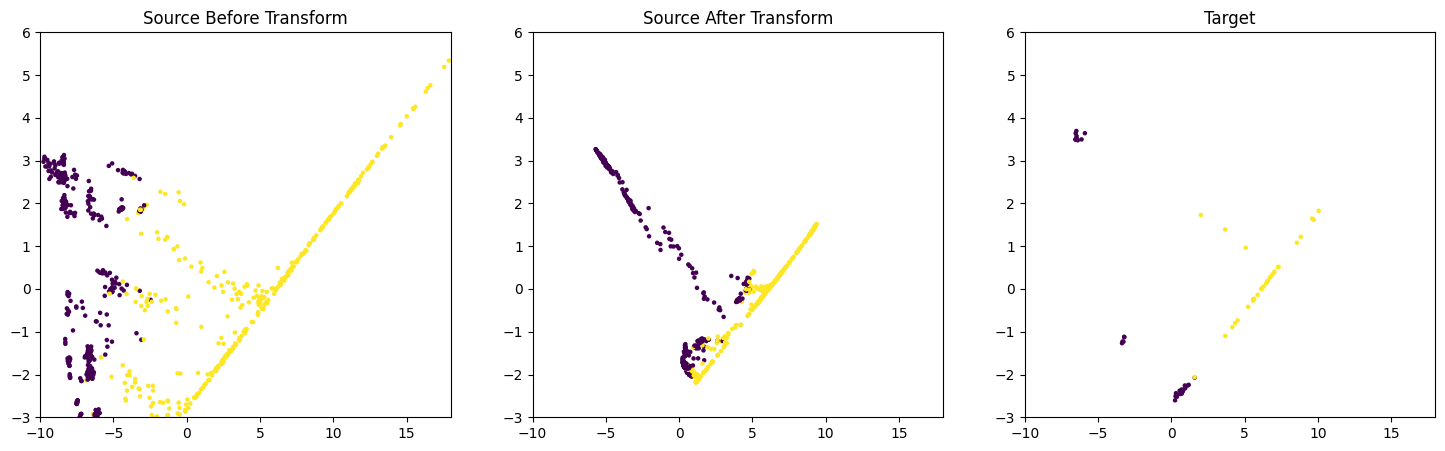

In [8]:
plt.figure(figsize=(18, 5))
import matplotlib.lines as mlines

ms = 5

plt.subplot(1, 3, 1)
plt.scatter(pca_data[pre_mask,0], pca_data[pre_mask,1],ms,c=Y[pre_mask,1])
# line = mlines.Line2D([0, 1], [0, 1], color='red')
# plt.xlim(-10, 18)
# plt.ylim(-6, 7)
# transform = ax1.transAxes
# line.set_transform(transform)
# plt.add_line(line)
# plt.plot([line1_x0, line1_x1], [line1_y0,line1_y1], color='red', lw=lw)
# plt.plot([line2_x0, line2_x1], [line2_y0,line2_y1], color='blue')
plt.xlim(-10, 18)
plt.ylim(-3, 6)
plt.title('Source Before Transform')
# plt.ylabel('Damped oscillation')


plt.subplot(1, 3, 2)
plt.scatter(pca_data[post_mask,0], pca_data[post_mask,1],ms,c=Y[post_mask,1])
# plt.plot([line1_x0, line1_x1], [line1_y0,line1_y1], color='red')
# plt.plot([line2_x0, line2_x1], [line2_y0,line2_y1], color='blue', lw=lw)
plt.xlim(-10, 18)
plt.ylim(-3, 6)
plt.title('Source After Transform')


plt.subplot(1, 3, 3)
plt.scatter(pca_data[tar_mask,0], pca_data[tar_mask,1],ms,c=Y[tar_mask,1])
# plt.plot([line1_x0, line1_x1], [line1_y0,line1_y1], color='red', lw=lw)
# plt.plot([line2_x0, line2_x1], [line2_y0,line2_y1], color='blue', lw=lw)
plt.xlim(-10, 18)
plt.ylim(-3, 6)
# plt.xlim(-, 60)
plt.title('Target')

plt.show()

In [9]:
tsne = TSNE(n_components=2)
all_tsne = tsne.fit_transform(all_data)

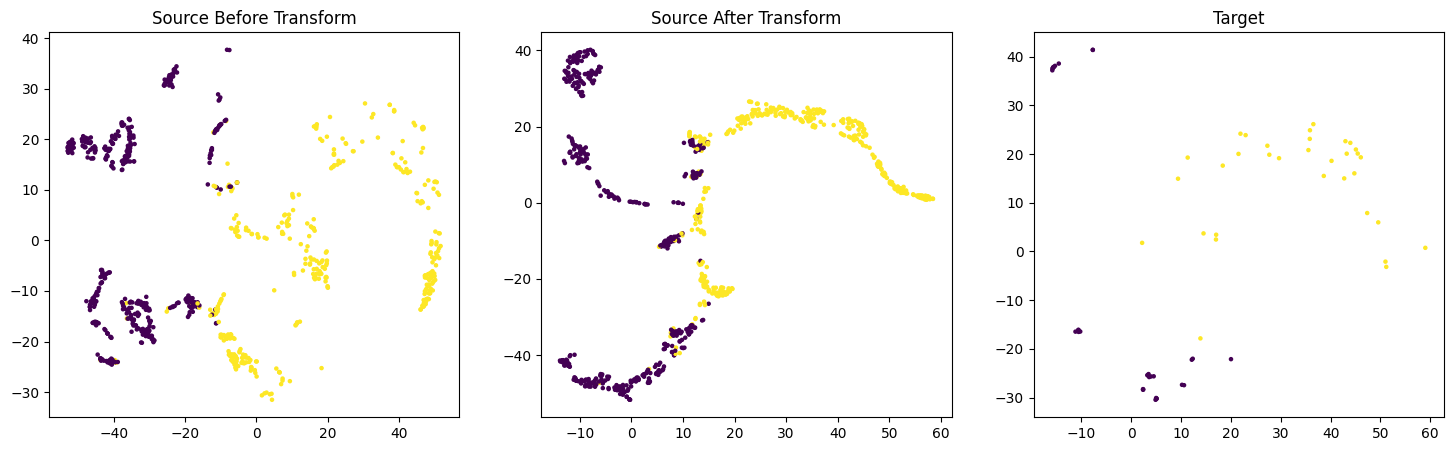

In [10]:
plt.figure(figsize=(18, 5))
import matplotlib.lines as mlines

ms = 5

plt.subplot(1, 3, 1)
plt.scatter(all_tsne[pre_mask,0], all_tsne[pre_mask,1],ms,c=Y[pre_mask,1])
# line = mlines.Line2D([0, 1], [0, 1], color='red')
# plt.xlim(-10, 18)
# plt.ylim(-6, 7)
# transform = ax1.transAxes
# line.set_transform(transform)
# plt.add_line(line)
# plt.plot([line1_x0, line1_x1], [line1_y0,line1_y1], color='red', lw=lw)
# plt.plot([line2_x0, line2_x1], [line2_y0,line2_y1], color='blue')
# plt.xlim(-10, 18)
# plt.ylim(-3, 6)
plt.title('Source Before Transform')
# plt.ylabel('Damped oscillation')


plt.subplot(1, 3, 2)
plt.scatter(all_tsne[post_mask,0], all_tsne[post_mask,1],ms,c=Y[post_mask,1])
# plt.plot([line1_x0, line1_x1], [line1_y0,line1_y1], color='red')
# plt.plot([line2_x0, line2_x1], [line2_y0,line2_y1], color='blue', lw=lw)
# plt.xlim(-10, 18)
# plt.ylim(-3, 6)
plt.title('Source After Transform')


plt.subplot(1, 3, 3)
plt.scatter(all_tsne[tar_mask,0], all_tsne[tar_mask,1],ms,c=Y[tar_mask,1])
# plt.plot([line1_x0, line1_x1], [line1_y0,line1_y1], color='red', lw=lw)
# plt.plot([line2_x0, line2_x1], [line2_y0,line2_y1], color='blue', lw=lw)
# plt.xlim(-10, 18)
# plt.ylim(-3, 6)
# plt.xlim(-, 60)
plt.title('Target')

plt.show()

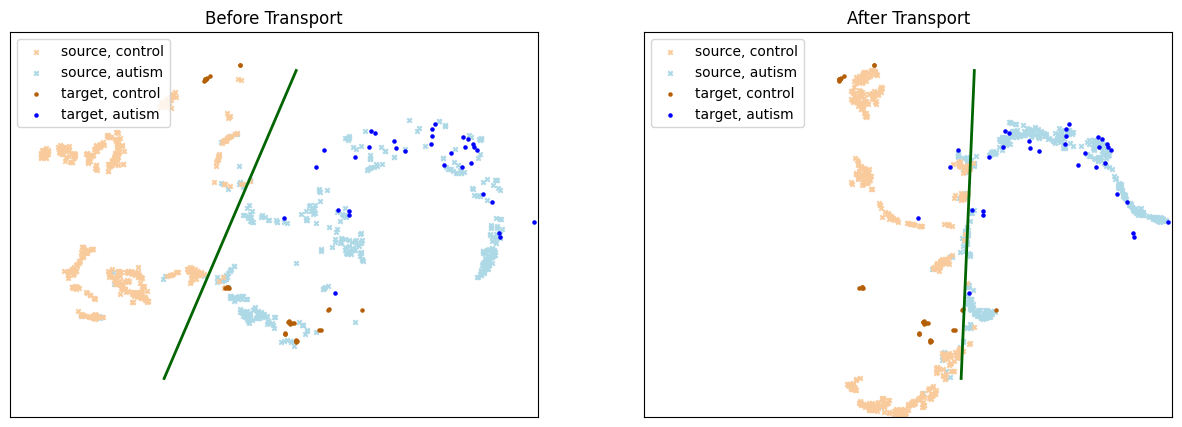

In [35]:
plt.figure(figsize=(15, 5))
import matplotlib.lines as mlines

line1_y0 = -40
line1_x0 = -25
line1_y1 = 40
line1_x1 = 5


line2_y0 = -40
line2_x0 = 12
line2_y1 = 40
line2_x1 = 15

lw = 2
ms_x = 10
ms_o = 5

set_to_use =all_tsne

pre=set_to_use[pre_mask]
pre_0=pre[Y_s[:,1]==0]
pre_1=pre[Y_s[:,1]==1]

post=set_to_use[post_mask]
post_0=post[Y_s[:,1]==0]
post_1=post[Y_s[:,1]==1]

tar=set_to_use[tar_mask]
tar_0=tar[Y_t[:,1]==0]
tar_1=tar[Y_t[:,1]==1]

plt.subplot(1, 2, 1)
# lpre0 = plt.scatter(pca_pre_0[:,0], pca_pre_0[:,1],ms_x,marker='x',c='#b4a7d6')
# lpre1 = plt.scatter(pca_pre_1[:,0], pca_pre_1[:,1],ms_x,marker='x',c='lightgreen')
# ltar0 = plt.scatter(pca_tar_0[:,0], pca_tar_0[:,1],ms_o,marker='o',color='purple')
# ltar1 = plt.scatter(pca_tar_1[:,0], pca_tar_1[:,1],ms_o,marker='o',c='darkgreen')
lpre1 = plt.scatter(pre_1[:,0], pre_1[:,1],ms_x,marker='x',c='lightblue')
lpre0 = plt.scatter(pre_0[:,0], pre_0[:,1],ms_x,marker='x',c='#f9cb9c')
ltar0 = plt.scatter(tar_0[:,0], tar_0[:,1],ms_o,marker='o',color='#b45f06')
ltar1 = plt.scatter(tar_1[:,0], tar_1[:,1],ms_o,marker='o',c='blue')
plt.plot([line1_x0, line1_x1], [line1_y0,line1_y1], color='darkgreen', lw=lw)

# plt.xlim(-10, 18)
# plt.ylim(-6, 7)
plt.xlim(-60, 60)
plt.ylim(-50,50)
plt.xticks([])
plt.yticks([])
plt.title('Before Transport')

plt.legend((lpre0, lpre1, ltar0, ltar1),
           ('source, control', 'source, autism','target, control', 'target, autism',),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)
# plt.ylabel('Damped oscillation')


plt.subplot(1, 2, 2)
# lpost0 = plt.scatter(pca_post_0[:,0], pca_post_0[:,1],ms_x,marker='x',c='#b4a7d6')
# lpost1 = plt.scatter(pca_post_1[:,0], pca_post_1[:,1],ms_x,marker='x',c='lightgreen')
# ltar0 = plt.scatter(pca_tar_0[:,0], pca_tar_0[:,1],ms_o,marker='o',color='purple')
# ltar1 = plt.scatter(pca_tar_1[:,0], pca_tar_1[:,1],ms_o,marker='o',c='darkgreen')
lpost1 = plt.scatter(post_1[:,0], post_1[:,1],ms_x,marker='x',c='lightblue')
lpost0 = plt.scatter(post_0[:,0], post_0[:,1],ms_x,marker='x',c='#f9cb9c')
ltar0 = plt.scatter(tar_0[:,0], tar_0[:,1],ms_o,marker='o',color='#b45f06')
ltar1 = plt.scatter(tar_1[:,0], tar_1[:,1],ms_o,marker='o',c='blue')
plt.plot([line2_x0, line2_x1], [line2_y0,line2_y1], color='darkgreen', lw=lw)
plt.xlim(-60, 60)
plt.ylim(-50,50)
plt.xticks([])
plt.yticks([])
plt.title('After Transport')
plt.legend((lpost0, lpost1, ltar0, ltar1),
           ('source, control', 'source, autism','target, control', 'target, autism',),
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=10)


plt.show()

In [12]:
pre_pca_source_df = pd.DataFrame(pca_data[pre_mask],columns=['pc1','pc2'])
pre_pca_source_df['label'] = Y[pre_mask,1]

post_pca_source_df = pd.DataFrame(pca_data[post_mask],columns=['pc1','pc2'])
post_pca_source_df['label'] = Y[post_mask,1]

pca_target_df = pd.DataFrame(pca_data[tar_mask],columns=['pc1','pc2'])
pca_target_df['label'] = Y[tar_mask,1]

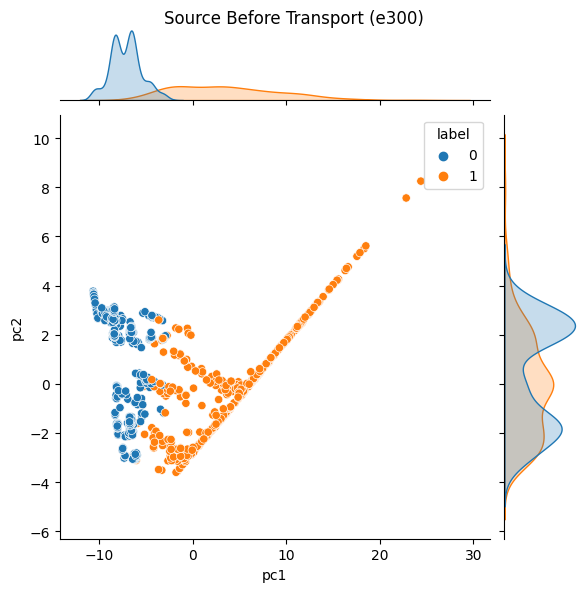

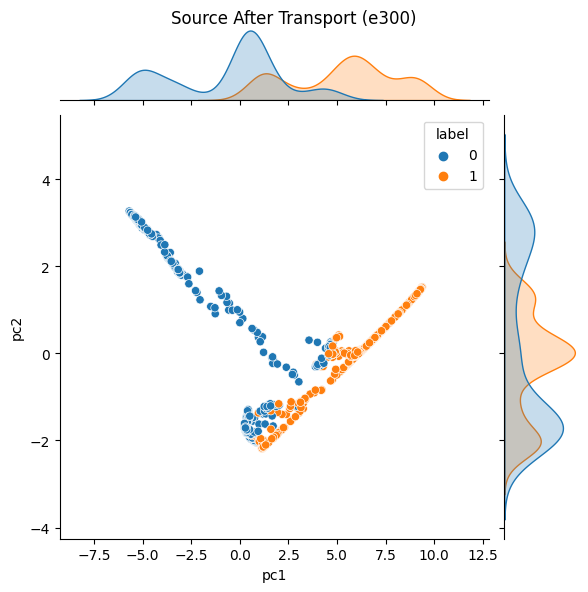

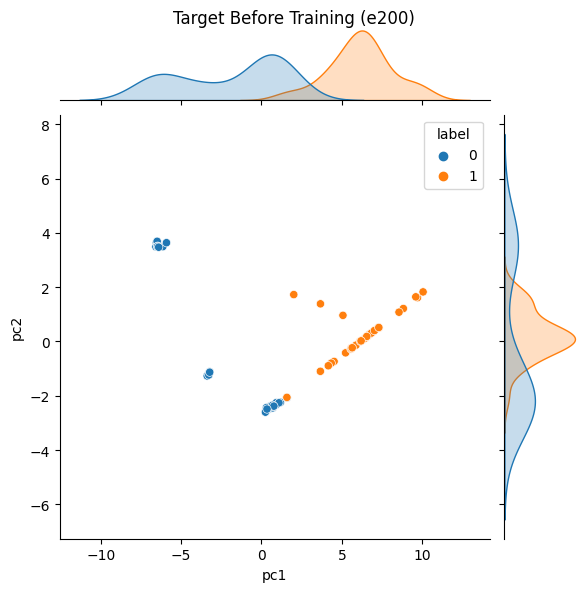

In [13]:

sns.jointplot(data=pre_pca_source_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Source Before Transport (e300)")
plt.subplots_adjust(top=0.95)


sns.jointplot(data=post_pca_source_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Source After Transport (e300)")
plt.subplots_adjust(top=0.95)

p=sns.jointplot(data=pca_target_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Target Before Training (e200)")
plt.subplots_adjust(top=0.95)

# pre_pca_target_300_df = pd.DataFrame(pre_pca[target_mask],columns=['pc1','pc2'])
# pre_pca_target_300_df['label'] = Y[target_mask,1]
# p=sns.jointplot(data=pre_pca_target_300_df, x="pc1", y="pc2",hue='label')
# plt.suptitle("Target After Training (e300)")
# plt.subplots_adjust(top=0.95)

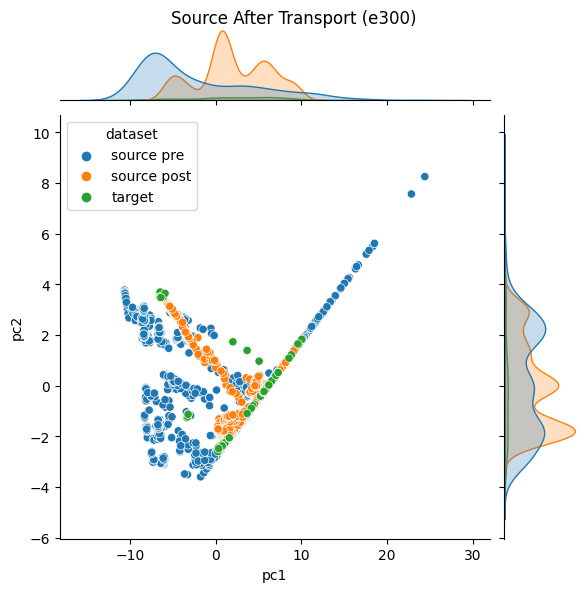

In [14]:

pre_pca_source_df['dataset'] = 'source pre'
post_pca_source_df['dataset'] = 'source post'
pca_target_df['dataset'] = 'target'

all = pd.concat([pre_pca_source_df,post_pca_source_df,pca_target_df])
# all = pd.DataFrame([pre_pca_source_df,post_pca_source_df,pca_target_df])

sns.jointplot(data=all, x="pc1", y="pc2",hue='dataset')
plt.suptitle("Source After Transport (e300)")
plt.subplots_adjust(top=0.95)

<Axes: xlabel='pc1', ylabel='pc2'>

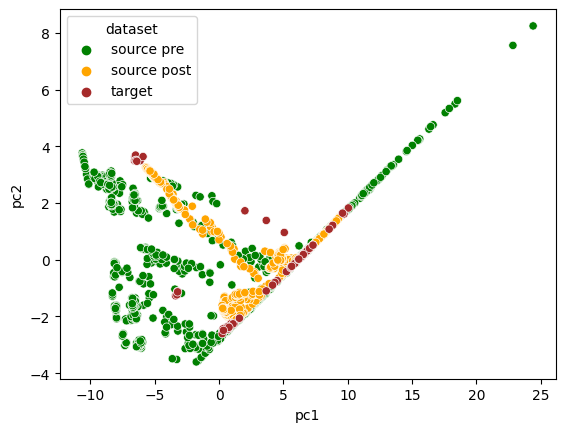

In [15]:
sns.scatterplot(data=all, x="pc1", y="pc2",hue='dataset',palette=['green','orange','brown'])
# plt.suptitle("Source After Transport (e300)")

In [16]:
# from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
# temp = np.concatenate((pre_data, post_data[source_mask]),axis=0)
# s1_mask = np.concatenate((source_mask, np.zeros(source_mask.sum(),dtype=bool)),axis=0)
# t_mask = np.concatenate((target_mask, np.zeros(source_mask.sum(),dtype=bool)),axis=0)
# s2_mask = np.concatenate((np.zeros(source_mask.shape[0],dtype=bool), np.ones(source_mask.sum(),dtype=bool)),axis=0)
# Y=np.concatenate((Y_s, Y_t),axis=0)
all_tsne = tsne.fit_transform(all_data)

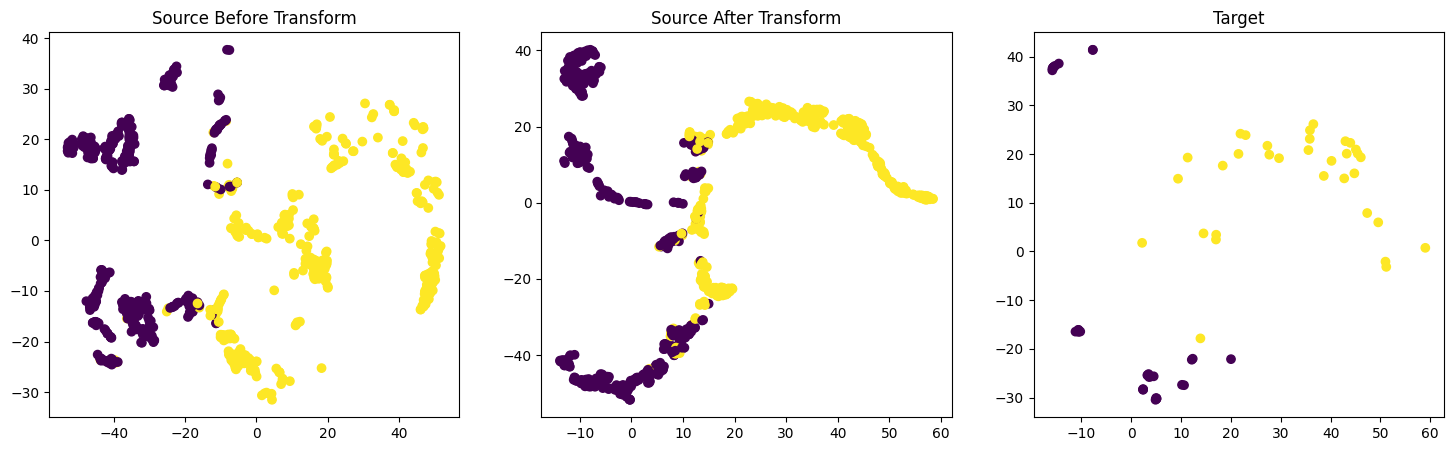

In [17]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(all_tsne[pre_mask,0], all_tsne[pre_mask,1],c=Y[pre_mask,1])
plt.title('Source Before Transform')
# plt.ylabel('Damped oscillation')


plt.subplot(1, 3, 2)
plt.scatter(all_tsne[post_mask,0], all_tsne[post_mask,1],c=Y[post_mask,1])
plt.title('Source After Transform')


plt.subplot(1, 3, 3)
plt.scatter(all_tsne[tar_mask,0], all_tsne[tar_mask,1],c=Y[tar_mask,1])
plt.title('Target')

plt.show()

In [18]:
pre_pca_source_df = pd.DataFrame(all_tsne[pre_mask],columns=['pc1','pc2'])
pre_pca_source_df['label'] = Y[pre_mask,1]

post_pca_source_df = pd.DataFrame(all_tsne[post_mask],columns=['pc1','pc2'])
post_pca_source_df['label'] = Y[post_mask,1]

pca_target_df = pd.DataFrame(all_tsne[tar_mask],columns=['pc1','pc2'])
pca_target_df['label'] = Y[tar_mask,1]

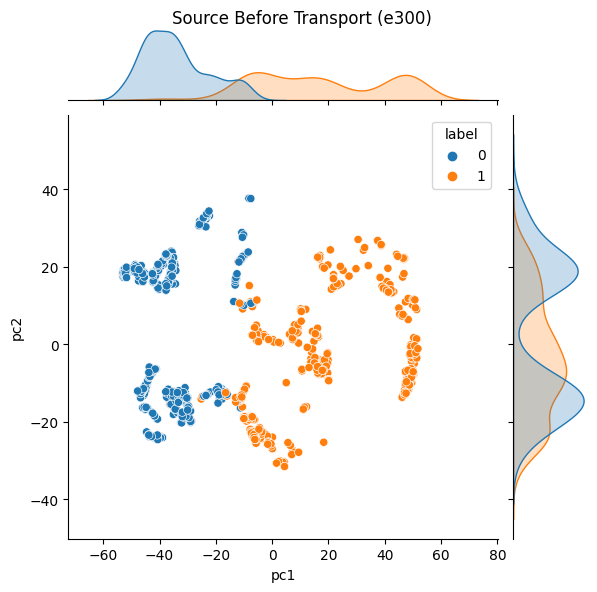

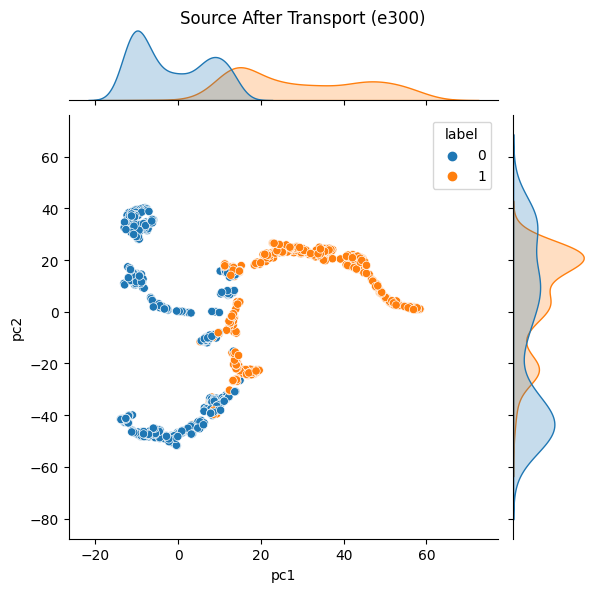

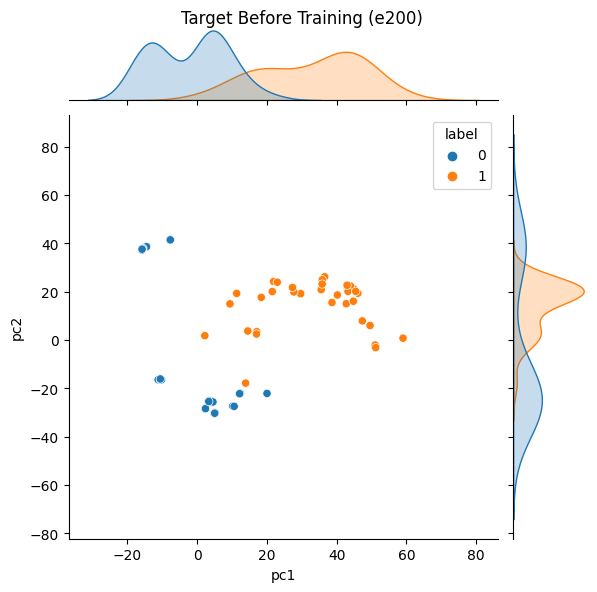

In [19]:

sns.jointplot(data=pre_pca_source_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Source Before Transport (e300)")
plt.subplots_adjust(top=0.95)


sns.jointplot(data=post_pca_source_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Source After Transport (e300)")
plt.subplots_adjust(top=0.95)

p=sns.jointplot(data=pca_target_df, x="pc1", y="pc2",hue='label')
plt.suptitle("Target Before Training (e200)")
plt.subplots_adjust(top=0.95)

# pre_pca_target_300_df = pd.DataFrame(pre_pca[target_mask],columns=['pc1','pc2'])
# pre_pca_target_300_df['label'] = Y[target_mask,1]
# p=sns.jointplot(data=pre_pca_target_300_df, x="pc1", y="pc2",hue='label')
# plt.suptitle("Target After Training (e300)")
# plt.subplots_adjust(top=0.95)

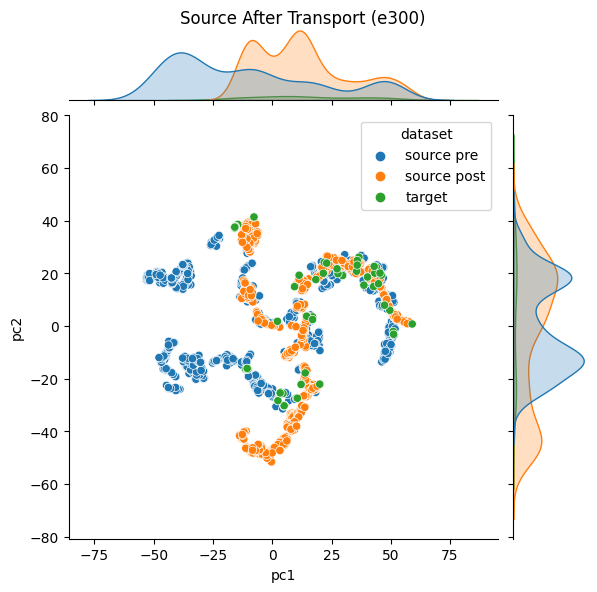

In [20]:

pre_pca_source_df['dataset'] = 'source pre'
post_pca_source_df['dataset'] = 'source post'
pca_target_df['dataset'] = 'target'

all = pd.concat([pre_pca_source_df,post_pca_source_df,pca_target_df])
# all = pd.DataFrame([pre_pca_source_df,post_pca_source_df,pca_target_df])

sns.jointplot(data=all, x="pc1", y="pc2",hue='dataset')
plt.suptitle("Source After Transport (e300)")
plt.subplots_adjust(top=0.95)

In [21]:
pca_target_df.shape
post_pca_source_df.shape

(804, 4)